In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib import pyplot as plt
plt.rcParams['axes.grid'] = True

In [3]:
hdat = pd.read_csv("../history.csv")
hdat.head()

,DATE_OF_INTEREST,AS_OF,"Cases/day, 7 day avg",DEATH_COUNT,"Deaths/day, 7 day avg",HOSPITALIZED_CASE_COUNT,"Hospitalized/day, 7 day avg",NEW_COVID_CASE_COUNT
0,2020-03-02,2020-03-26 11:26:41,1.00,NaN,NaN,NaN,NaN,1
1,2020-03-03,2020-03-26 11:26:41,1.50,NaN,NaN,3.0,3.000000,2
2,2020-03-04,2020-03-26 11:26:41,4.00,NaN,NaN,3.0,3.000000,9
3,2020-03-05,2020-03-26 11:26:41,3.25,NaN,NaN,4.0,3.333333,1
4,2020-03-06,2020-03-26 11:26:41,4.20,NaN,NaN,5.0,3.750000,8


In [4]:
hdat["DATE_OF_INTEREST"] = pd.to_datetime(hdat["DATE_OF_INTEREST"])
hdat["AS_OF"] = pd.to_datetime(hdat["AS_OF"])
hdat["Days"] = hdat.groupby("DATE_OF_INTEREST").cumcount()
hdat["Age"] = hdat["AS_OF"] - hdat["DATE_OF_INTEREST"]

In [5]:
hdat.head()

,DATE_OF_INTEREST,AS_OF,"Cases/day, 7 day avg",DEATH_COUNT,"Deaths/day, 7 day avg",HOSPITALIZED_CASE_COUNT,"Hospitalized/day, 7 day avg",NEW_COVID_CASE_COUNT,Days,Age
0,2020-03-02,2020-03-26 11:26:41,1.00,NaN,NaN,NaN,NaN,1,0,24 days 11:26:41
1,2020-03-03,2020-03-26 11:26:41,1.50,NaN,NaN,3.0,3.000000,2,0,23 days 11:26:41
2,2020-03-04,2020-03-26 11:26:41,4.00,NaN,NaN,3.0,3.000000,9,0,22 days 11:26:41
3,2020-03-05,2020-03-26 11:26:41,3.25,NaN,NaN,4.0,3.333333,1,0,21 days 11:26:41
4,2020-03-06,2020-03-26 11:26:41,4.20,NaN,NaN,5.0,3.750000,8,0,20 days 11:26:41


In [6]:
hdat["Days"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25])

In [7]:
firstRpt = hdat[["DATE_OF_INTEREST", "NEW_COVID_CASE_COUNT"]].groupby("DATE_OF_INTEREST").first()
firstRpt.rename(columns={"NEW_COVID_CASE_COUNT": "First"}, inplace=True)
hdat = hdat.merge(firstRpt, how="left", on="DATE_OF_INTEREST")
hdat.head()

,DATE_OF_INTEREST,AS_OF,"Cases/day, 7 day avg",DEATH_COUNT,"Deaths/day, 7 day avg",HOSPITALIZED_CASE_COUNT,"Hospitalized/day, 7 day avg",NEW_COVID_CASE_COUNT,Days,Age,First
0,2020-03-02,2020-03-26 11:26:41,1.00,NaN,NaN,NaN,NaN,1,0,24 days 11:26:41,1
1,2020-03-03,2020-03-26 11:26:41,1.50,NaN,NaN,3.0,3.000000,2,0,23 days 11:26:41,2
2,2020-03-04,2020-03-26 11:26:41,4.00,NaN,NaN,3.0,3.000000,9,0,22 days 11:26:41,9
3,2020-03-05,2020-03-26 11:26:41,3.25,NaN,NaN,4.0,3.333333,1,0,21 days 11:26:41,1
4,2020-03-06,2020-03-26 11:26:41,4.20,NaN,NaN,5.0,3.750000,8,0,20 days 11:26:41,8


In [8]:
lastRpt = hdat[["DATE_OF_INTEREST", "NEW_COVID_CASE_COUNT"]].groupby("DATE_OF_INTEREST").last()
lastRpt.rename(columns={"NEW_COVID_CASE_COUNT": "Last"}, inplace=True)
hdat = hdat.merge(lastRpt, how="left", on="DATE_OF_INTEREST")
hdat.head()

,DATE_OF_INTEREST,AS_OF,"Cases/day, 7 day avg",DEATH_COUNT,"Deaths/day, 7 day avg",HOSPITALIZED_CASE_COUNT,"Hospitalized/day, 7 day avg",NEW_COVID_CASE_COUNT,Days,Age,First,Last
0,2020-03-02,2020-03-26 11:26:41,1.00,NaN,NaN,NaN,NaN,1,0,24 days 11:26:41,1,1
1,2020-03-03,2020-03-26 11:26:41,1.50,NaN,NaN,3.0,3.000000,2,0,23 days 11:26:41,2,1
2,2020-03-04,2020-03-26 11:26:41,4.00,NaN,NaN,3.0,3.000000,9,0,22 days 11:26:41,9,5
3,2020-03-05,2020-03-26 11:26:41,3.25,NaN,NaN,4.0,3.333333,1,0,21 days 11:26:41,1,3
4,2020-03-06,2020-03-26 11:26:41,4.20,NaN,NaN,5.0,3.750000,8,0,20 days 11:26:41,8,7


In [9]:
hdat

,DATE_OF_INTEREST,AS_OF,"Cases/day, 7 day avg",DEATH_COUNT,"Deaths/day, 7 day avg",HOSPITALIZED_CASE_COUNT,"Hospitalized/day, 7 day avg",NEW_COVID_CASE_COUNT,Days,Age,First,Last
0,2020-03-02,2020-03-26 11:26:41,1.000000,NaN,NaN,NaN,NaN,1,0,24 days 11:26:41,1,1
1,2020-03-03,2020-03-26 11:26:41,1.500000,NaN,NaN,3.0,3.000000,2,0,23 days 11:26:41,2,1
2,2020-03-04,2020-03-26 11:26:41,4.000000,NaN,NaN,3.0,3.000000,9,0,22 days 11:26:41,9,5
3,2020-03-05,2020-03-26 11:26:41,3.250000,NaN,NaN,4.0,3.333333,1,0,21 days 11:26:41,1,3
4,2020-03-06,2020-03-26 11:26:41,4.200000,NaN,NaN,5.0,3.750000,8,0,20 days 11:26:41,8,7
...,...,...,...,...,...,...,...,...,...,...,...,...
974,2020-04-15,2020-04-20 14:30:15,3521.428571,280.0,380.285714,541.0,783.285714,3015,4,5 days 14:30:15,34,3015
975,2020-04-16,2020-04-20 14:30:15,3133.000000,226.0,350.285714,221.0,664.714286,2107,3,4 days 14:30:15,26,2107
976,2020-04-17,2020-04-20 14:30:15,2734.000000,175.0,315.714286,86.0,539.571429,1389,2,3 days 14:30:15,38,1389
977,2020-04-18,2020-04-20 14:30:15,2292.571429,99.0,272.571429,18.0,435.285714,377,1,2 days 14:30:15,23,377


In [26]:
hdat["Growth"] = hdat["Last"]/hdat["NEW_COVID_CASE_COUNT"]
hdat["Age (days)"] = hdat["Age"].dt.days

In [27]:
df = hdat.pivot_table(index="Age (days)",
                 columns="DATE_OF_INTEREST",
                 values="Growth")

In [28]:
df

DATE_OF_INTEREST,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,...,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19
Age (days),,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,56.513514,173.350000,28.260870,106.214286,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.902696,4.678812,5.189621,45.060606,137.923077,88.676471,81.038462,36.552632,16.391304,1.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.749791,2.526968,4.626335,3.731493,71.158842,3.988095,2.809333,2.480357,1.000000,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.565706,2.490661,2.469136,2.675659,1.937331,1.690022,1.339479,1.000000,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.543173,1.992529,2.180711,1.343270,1.286688,1.098361,1.000000,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.264590,1.716455,1.278269,1.098633,1.094294,1.000000,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.190938,1.113717,1.083333,1.067864,1.000000,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.051018,1.055403,1.028074,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.019006,1.018508,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


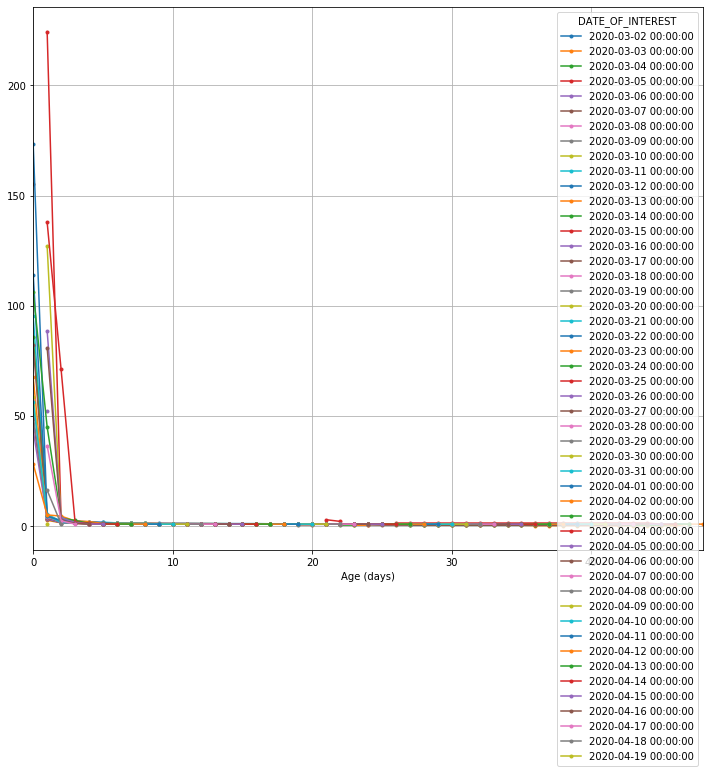

In [29]:
fig, ax = plt.subplots(figsize=(12,10))
df.plot(style=".-", ax=ax)

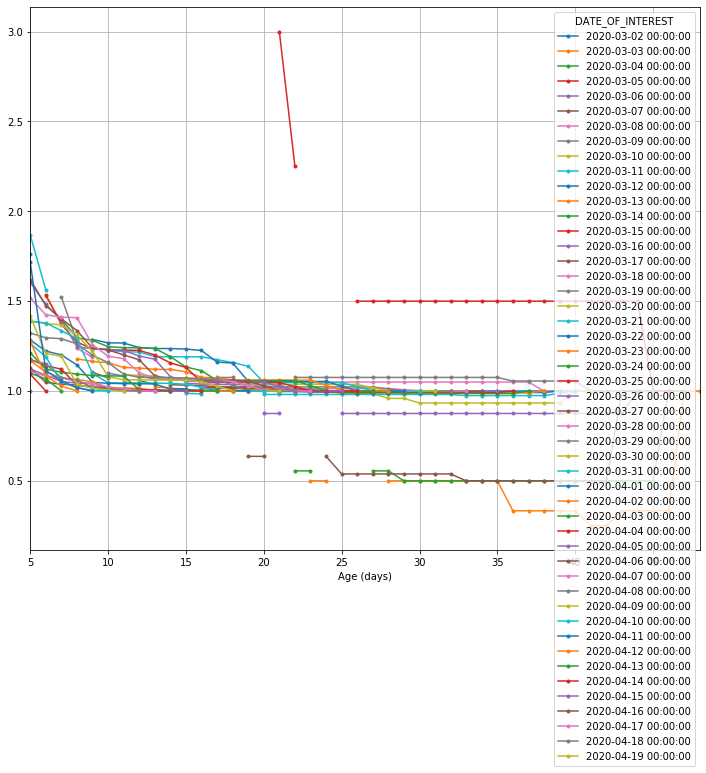

In [34]:
fig, ax = plt.subplots(figsize=(12,10))
df[df.index >= 5].plot(style=".-", ax=ax)